# Plot variability of surface speed

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean as cm
import matplotlib.gridspec as gridspec
%matplotlib inline

# Stop annoying warnings coming out of xarray.
import warnings
warnings.filterwarnings('ignore')

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 28,Total memory: 125.20 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45277,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 125.20 GiB
Comm: tcp://127.0.0.1:39745,Total threads: 4
Dashboard: /proxy/42091/status,Memory: 17.89 GiB
Nanny: tcp://127.0.0.1:43913,


In [3]:
# CM2 database
session_CM2 = cc.database.create_session('/g/data/p73/archive/non-CMIP/ACCESS-CM2/CM2.db')
expt_CM2_025 = 'cj877'
expt_CM2_1   = 'bz687'

In [4]:
# OM2 database
session_OM2  = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')
expt_OM2_025 = '025deg_jra55_ryf9091_gadi'
expt_OM2_1   = '1deg_jra55_ryf9091_gadi'

In [5]:
path_to_data = '/g/data/x77/wgh581/Post_Process/ACCESS_CM2_025/'

If you get a 'read-only database' warning, it is because the database has not finished building. 

In [6]:
# Plotting info
ft_size = 16
plt.rcParams.update({'font.size': ft_size})
fig_path = '/g/data/x77/wgh581/Figures/Figures_ACCESS_CM2/'

### Load surface speed

In [7]:
speed_CM2_025 = xr.open_dataarray(path_to_data + 'speed_sfc_CM2_025_annual.nc')
speed_CM2_1   = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_CM2_1/speed_sfc_CM2_1_annual.nc')
speed_OM2_025 = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_OM2_025/speed_sfc_OM2_025_annual.nc')
speed_OM2_1   = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_OM2_1/speed_sfc_OM2_1_annual.nc')

Add geolon, geolat coordinates

In [8]:
geolon_c = xr.open_dataset('/g/data/ik11/grids/ocean_grid_025.nc').geolon_c
geolat_c = xr.open_dataset('/g/data/ik11/grids/ocean_grid_025.nc').geolat_c

In [9]:
geolon_c_1 = xr.open_dataset('/g/data/ik11/grids/ocean_grid_10.nc').geolon_c
geolat_c_1 = xr.open_dataset('/g/data/ik11/grids/ocean_grid_10.nc').geolat_c

In [10]:
speed_CM2_025 = speed_CM2_025.assign_coords({'geolon_c': geolon_c, 'geolat_c': geolat_c})
speed_OM2_025 = speed_OM2_025.assign_coords({'geolon_c': geolon_c, 'geolat_c': geolat_c})

speed_CM2_1   = speed_CM2_1.assign_coords({'geolon_c': geolon_c_1, 'geolat_c': geolat_c_1})
speed_OM2_1   = speed_OM2_1.assign_coords({'geolon_c': geolon_c_1, 'geolat_c': geolat_c_1})

In [11]:
import cartopy.feature as cft

land_50m = cft.NaturalEarthFeature('physical', 'land', '50m', edgecolor='black', facecolor='darkgrey', linewidth=0.5)

Plotting

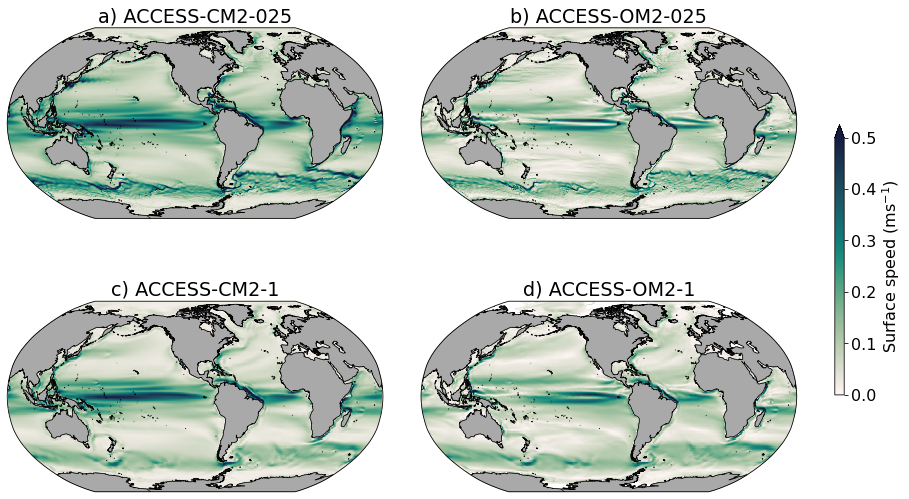

In [52]:
fig = plt.figure(figsize=(15,10))
gs  = gridspec.GridSpec(8, 3, width_ratios=[1, 1, 0.025], hspace=0.05, wspace=0.15)

ax = fig.add_subplot(gs[0:4,0], projection=ccrs.Robinson(central_longitude=-100))
sc = speed_CM2_025.mean('time').plot(x='geolon_c', y='geolat_c', transform=ccrs.PlateCarree(), vmin=0, vmax=0.5, cmap=cm.cm.tempo, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('a) ACCESS-CM2-025')

ax = fig.add_subplot(gs[0:4,1], projection=ccrs.Robinson(central_longitude=-100))
speed_OM2_025.mean('time').plot(x='geolon_c', y='geolat_c', transform=ccrs.PlateCarree(), vmin=0, vmax=0.5, cmap=cm.cm.tempo, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('b) ACCESS-OM2-025')

cbar_ax = fig.add_subplot(gs[2:6, 2])
cbar = plt.colorbar(sc, cax=cbar_ax, label='Surface speed (ms$^{-1}$)', extend='max')

ax = fig.add_subplot(gs[4:,0], projection=ccrs.Robinson(central_longitude=-100))
speed_CM2_1.mean('time').plot(x='geolon_c', y='geolat_c', transform=ccrs.PlateCarree(), vmin=0, vmax=0.5, cmap=cm.cm.tempo, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('c) ACCESS-CM2-1')

ax = fig.add_subplot(gs[4:,1], projection=ccrs.Robinson(central_longitude=-100))
sc = speed_OM2_1.mean('time').plot(x='xu_ocean', y='yu_ocean', transform=ccrs.PlateCarree(), vmin=0, vmax=0.5, cmap=cm.cm.tempo, add_colorbar=False) # Need to fix coordinates (geolon, geolat didn't work, masking error)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('d) ACCESS-OM2-1')

# cbar_ax = fig.add_subplot(gs[5:7, 2])
# cbar = plt.colorbar(sc, cax=cbar_ax, label='Surface speed (ms$^{-1}$)')

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_surface_speed_maps.png'
    plt.savefig(fig_path + fig_name, dpi=300);

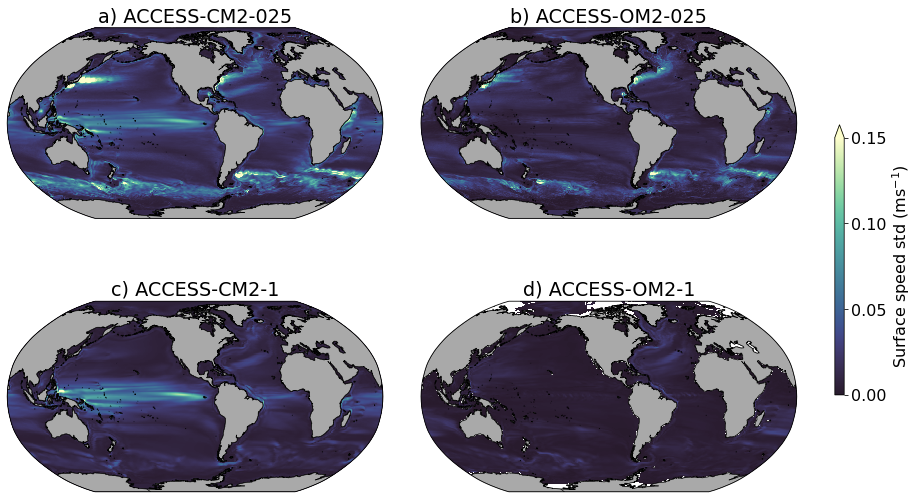

In [12]:
fig = plt.figure(figsize=(15,10))
gs  = gridspec.GridSpec(8, 3, width_ratios=[1, 1, 0.025], hspace=0.05, wspace=0.15)

ax = fig.add_subplot(gs[0:4,0], projection=ccrs.Robinson(central_longitude=-100))
sc = speed_CM2_025.std('time').plot(x='geolon_c', y='geolat_c', transform=ccrs.PlateCarree(), vmin=0, vmax=0.15, cmap=cm.cm.deep_r, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('a) ACCESS-CM2-025')

ax = fig.add_subplot(gs[0:4,1], projection=ccrs.Robinson(central_longitude=-100))
speed_OM2_025.std('time').plot(x='geolon_c', y='geolat_c', transform=ccrs.PlateCarree(), vmin=0, vmax=0.15, cmap=cm.cm.deep_r, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('b) ACCESS-OM2-025')

cbar_ax = fig.add_subplot(gs[2:6, 2])
cbar = plt.colorbar(sc, cax=cbar_ax, label='Surface speed std (ms$^{-1}$)', extend='max', ticks=np.arange(0, 0.2, 0.05))

ax = fig.add_subplot(gs[4:,0], projection=ccrs.Robinson(central_longitude=-100))
speed_CM2_1.std('time').plot(x='geolon_c', y='geolat_c', transform=ccrs.PlateCarree(), vmin=0, vmax=0.15, cmap=cm.cm.deep_r, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('c) ACCESS-CM2-1')

ax = fig.add_subplot(gs[4:,1], projection=ccrs.Robinson(central_longitude=-100))
sc = speed_OM2_1.std('time').plot(x='xu_ocean', y='yu_ocean', transform=ccrs.PlateCarree(), vmin=0, vmax=0.15, cmap=cm.cm.deep_r, add_colorbar=False) # Need to fix coordinates (geolon, geolat didn't work, masking error)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('d) ACCESS-OM2-1')

# cbar_ax = fig.add_subplot(gs[5:7, 2])
# cbar = plt.colorbar(sc, cax=cbar_ax, label='Surface speed (ms$^{-1}$)')

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_surface_speed_std_maps.png'
    plt.savefig(fig_path + fig_name, dpi=300);